# Step 1: Load and preview the dataset


In [30]:
import pandas as pd

df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Step 2: Summary statistics of the target variable (price)

In this step, we will examine the main variable we want to predict: the house price.
We will look at summary statistics such as mean, median, standard deviation, minimum, and maximum values.


In [32]:
# Display summary statistics for the 'price' column
df['price'].describe()


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

# Step 3: Visualizing the distribution of house prices

We'll plot a histogram to see how house prices are distributed and detect any outliers or skewness.


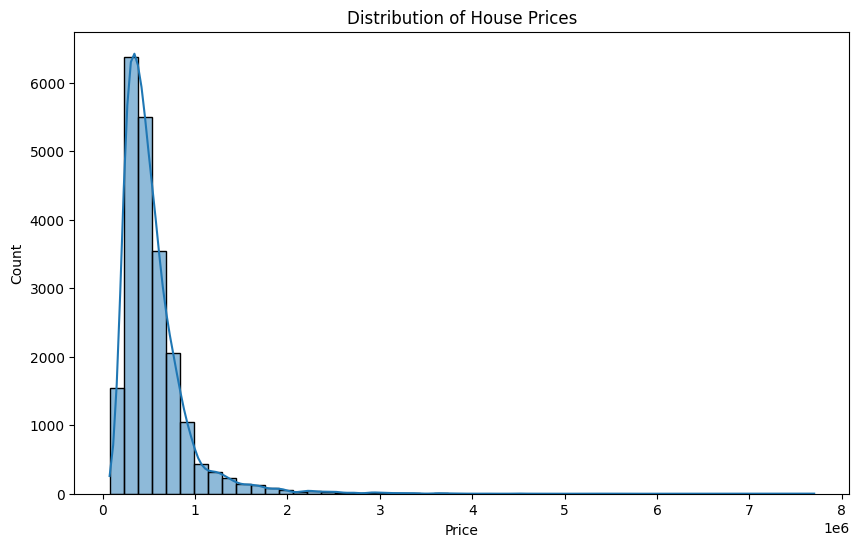

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


# Step 4: Handling skewness in the target variable

Since the house prices are right-skewed, applying a log transformation can help normalize the distribution,
which often improves model performance.


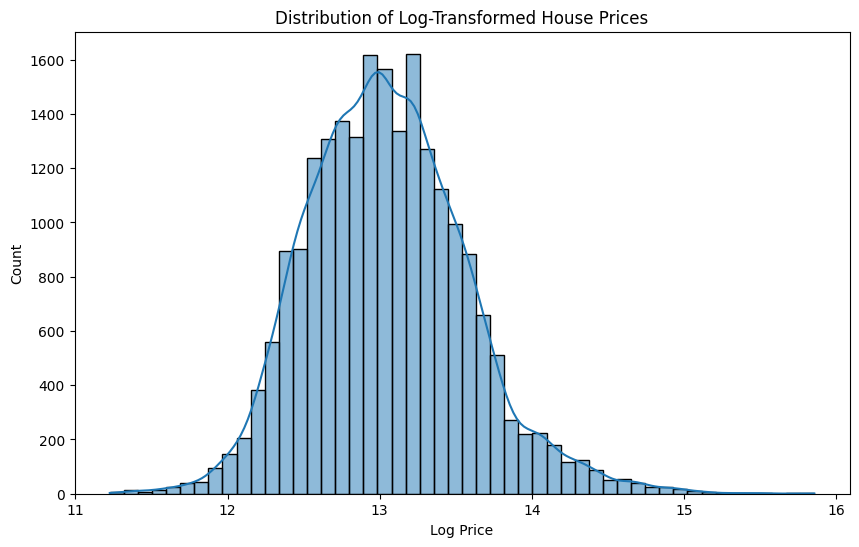

In [34]:
import numpy as np

# Create a new column with log-transformed prices
df['log_price'] = np.log1p(df['price'])

# Plot the distribution of log-transformed prices
plt.figure(figsize=(10,6))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('Log Price')
plt.ylabel('Count')
plt.show()


# Step 5: Exploring relationships between features and target variable

Let's investigate how some key features like 'sqft_living' and 'grade' relate to house prices.


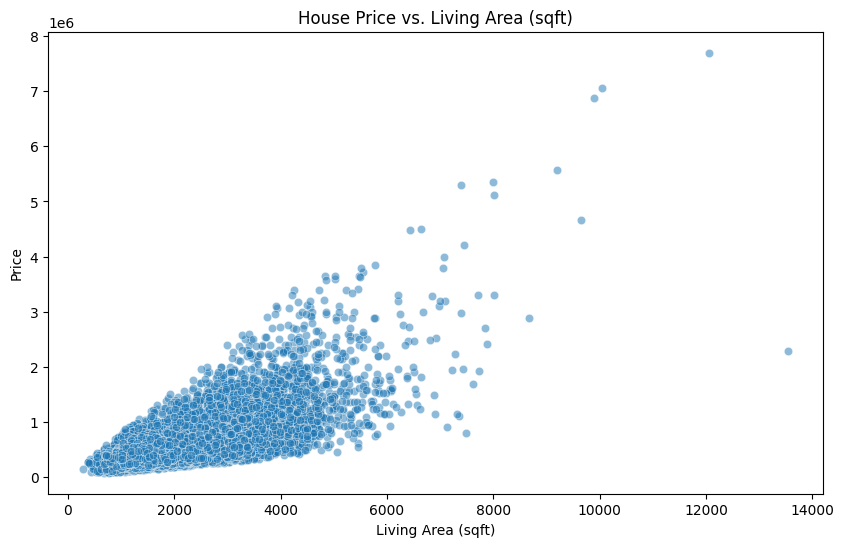

In [35]:
# Scatter plot: sqft_living vs price
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title('House Price vs. Living Area (sqft)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()


In [36]:
# Calculate correlation between living area and price
correlation = df[['sqft_living', 'price']].corr().iloc[0,1]
print(f"Correlation between sqft_living and price: {correlation:.2f}")


Correlation between sqft_living and price: 0.70


# Insight on correlation

The correlation coefficient between living area and price is about 0.7, indicating a strong positive relationship.
This confirms that larger houses tend to be more expensive, but other factors also influence the price.


# Step 6: Relationship between house quality ('grade') and price

The 'grade' variable indicates the overall quality of the house.
We expect higher grades to correspond to higher prices.
Let's visualize this with a boxplot.


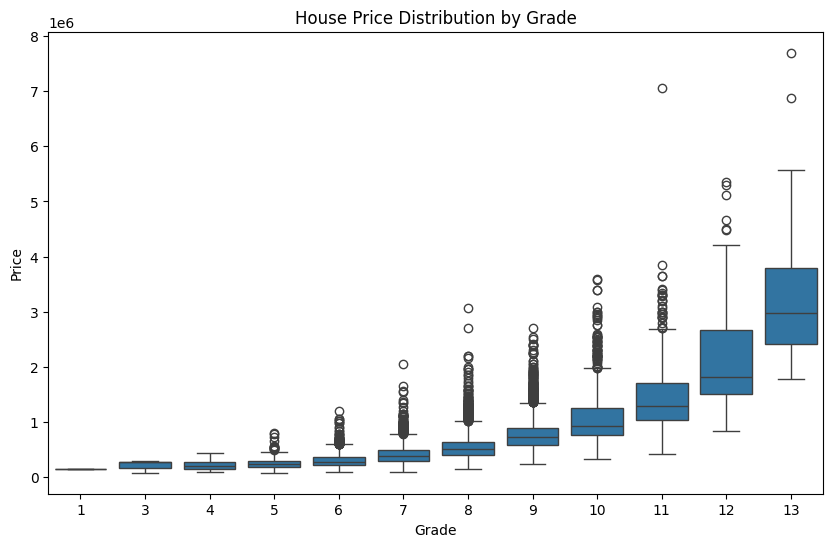

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='price', data=df)
plt.title('House Price Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()


# Insight on Grade vs. Price

The boxplot shows a clear trend: houses with higher grades tend to have higher prices.
There is also increasing price variability as the grade increases.
This indicates that the quality of the house strongly affects its price, but other factors may also play a role.


# Step 7: Correlation analysis between numerical features and house price

Let's calculate the correlation matrix to identify which features are most strongly correlated with the house price.
This helps us understand which variables might be good predictors.


In [38]:
# Calculate correlation matrix for numerical features
corr_matrix = df.select_dtypes('number').corr()

# Show correlation of features with price, sorted descending
corr_with_price = corr_matrix['price'].sort_values(ascending=False)
print(corr_with_price)


price            1.000000
log_price        0.891654
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


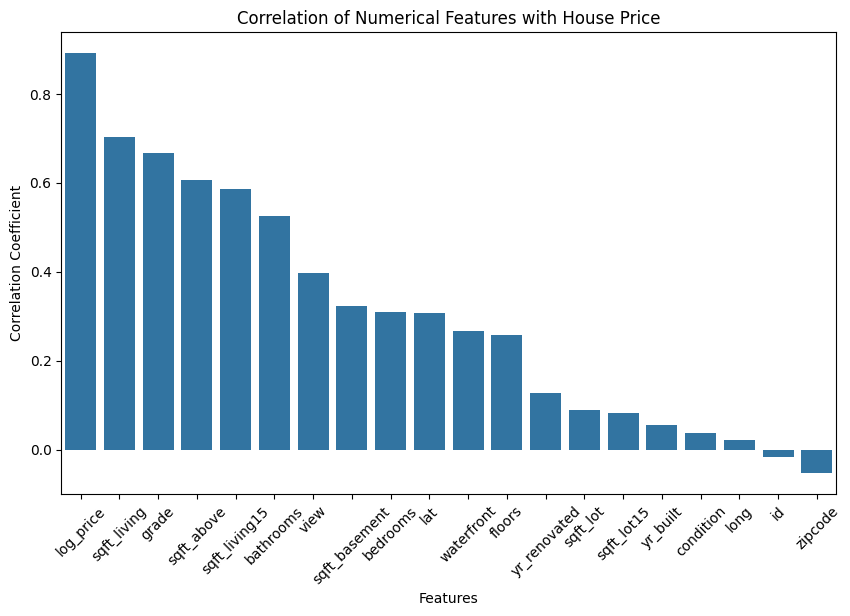

In [39]:
# Correlation with price, sorted descending
corr_with_price = corr_matrix['price'].sort_values(ascending=False)

# Plot correlation with price except price itself
plt.figure(figsize=(10,6))
sns.barplot(x=corr_with_price.index[1:], y=corr_with_price.values[1:])
plt.xticks(rotation=45)
plt.title('Correlation of Numerical Features with House Price')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()


# Insight on Correlation Analysis

The strongest positive correlations with house price are:

- `log_price` (which is just a transformation of price, expectedly high).
- `sqft_living` (size of the living area) with correlation ~0.7.
- `grade` (quality rating of the house) with correlation ~0.67.
- `sqft_above` (living area above ground) also strong at ~0.60.
- `bathrooms` and `view` also show moderate positive correlations.

Features like `yr_built`, `condition`, and `zipcode` show very weak or negative correlations, indicating they might be less useful for predicting price.

This helps us prioritize which features to focus on for building predictive models.


# Step 8: Data Cleaning - Checking for missing values

Before building models, we need to ensure the data is clean and has no missing values that could affect model training.
Let's check for any missing values in the dataset.


In [40]:
# Check missing values per column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


## Step 9: Feature Engineering & Preprocessing

In this step, we create new features that may help improve model performance and simplify learning patterns in the data. We also prepare the data for modeling by applying preprocessing techniques.


### 9.1 Create New Features


In [41]:
# Feature 1: Age of the house
df['house_age'] = 2025 - df['yr_built']

# Feature 2: Whether the house has been renovated
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Feature 3: Total number of rooms (bedrooms + bathrooms)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Display the first few rows to confirm
df[['yr_built', 'yr_renovated', 'house_age', 'is_renovated', 'total_rooms']].head()


,yr_built,yr_renovated,house_age,is_renovated,total_rooms
0,1955,0,70,0,4.00
1,1951,1991,74,1,5.25
2,1933,0,92,0,3.00
3,1965,0,60,0,7.00
4,1987,0,38,0,5.00


### Insights

- `house_age`: Newer houses tend to be more expensive, so modeling age could help capture this relationship.
- `is_renovated`: Renovated houses often have higher prices, so this binary feature may be very predictive.
- `total_rooms`: Combining bedrooms and bathrooms gives us a proxy for house size or utility.


### 9.2 Correlation with New Features 


In [42]:
# Check how new features correlate with price
df[['price', 'house_age', 'is_renovated', 'total_rooms']].corr()['price'].sort_values(ascending=False)


price           1.000000
total_rooms     0.466319
is_renovated    0.126092
house_age      -0.054012
Name: price, dtype: float64

### 9.3 Preprocessing Checkpoint

In [43]:
# Check for missing values again to be sure
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
log_price        0
house_age        0
is_renovated     0
total_rooms      0
dtype: int64

## NO missing values and the data still clean

## Summary

We successfully created three new features that enrich the dataset and may help improve model performance. We also confirmed the dataset has no missing values, so we are ready for encoding and scaling in the next steps.


## Step 10: Categorical Feature Encoding

To ensure our model can interpret categorical data properly, we will transform the `zipcode` column using one-hot encoding. This approach avoids introducing unintended ordinal relationships between zip codes, which are simply location identifiers.


In [44]:
# One-hot encode the 'zipcode' column
df_encoded = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

# Display shape before and after encoding
print(f"Original shape: {df.shape}")
print(f"After encoding: {df_encoded.shape}")


Original shape: (21613, 25)
After encoding: (21613, 93)


### Insights

- The dataset's shape changed from (21613, 22) to a larger number of columns due to one-hot encoding of `zipcode`.
- This ensures that the model treats each zip code as a separate category without implying any order.
- `drop_first=True` was used to avoid multicollinearity by dropping the first dummy variable.


## Step 11: Feature Scaling

To ensure that features are on a comparable scale, especially for models that rely on gradient descent or distance metrics, we will apply standard scaling to all numerical features (excluding the target `price` and its logarithmic form).


In [45]:
from sklearn.preprocessing import StandardScaler

# Make a copy to avoid changing the original dataframe
df_model = df_encoded.copy()

# Identify numerical features to scale (exclude 'price' and 'log_price')
features_to_scale = df_model.select_dtypes('number').drop(['price', 'log_price'], axis=1).columns

# Apply StandardScaler
scaler = StandardScaler()
df_model[features_to_scale] = scaler.fit_transform(df_model[features_to_scale])

# Display a preview
df_model[features_to_scale].head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,house_age,is_renovated,total_rooms
0,0.886146,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,...,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,0.544898,-0.210135,-1.002247
1,0.637511,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,...,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,0.681079,4.758845,-0.158945
2,0.365444,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,...,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,1.293892,-0.210135,-1.676889
3,-0.727656,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,...,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,0.204446,-0.210135,1.021678
4,-0.912881,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,...,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,-0.544548,-0.210135,-0.327605


### Insights

- Numerical features were successfully scaled to have a mean of 0 and standard deviation of 1.
- Target variables (`price` and `log_price`) were excluded from scaling.
- This scaling step ensures better performance and faster convergence during training.


## Step 12: Train-Test Split

We will now split the data into training and testing sets. This is essential for evaluating our model's performance on unseen data.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_model.drop(['price', 'log_price'], axis=1)
y = df_model['log_price']  # Using log-transformed target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


### Insights

- The data has been split into 80% for training and 20% for testing.
- This ensures that we can evaluate our model on unseen data and avoid overfitting.
